In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Indian_Startup_Investment_Trends.csv')

In [5]:
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (12428, 32)


,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,NaN,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,NaN,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,NaN,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,NaN,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


In [6]:
df.info()
df.describe()
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data[missing_data > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup_ID              12428 non-null  object 
 1   Name                    12428 non-null  object 
 2   Sector                  12428 non-null  object 
 3   Sub-Sector              12428 non-null  object 
 4   City                    12428 non-null  object 
 5   State                   12428 non-null  object 
 6   Founded_Year            12428 non-null  int64  
 7   Founder_Name            12428 non-null  object 
 8   Funding_Stage           12428 non-null  object 
 9   Investment_Type         12428 non-null  object 
 10  Amount_Raised           12428 non-null  int64  
 11  Investors_Count         12428 non-null  int64  
 12  Lead_Investor           12428 non-null  object 
 13  Co-Investors            12428 non-null  object 
 14  Valuation_Post_Funding  12428 non-null

Acquisition_Details    10027
dtype: int64

In [7]:
print("Columns in the dataset:")
print(df.columns)
if 'Funding Amount' in df.columns:
    df['Funding Amount'] = df['Funding Amount'].fillna(0)
    print("Column 'Funding Amount' not found. Please verify the column name.")
if 'Sector' in df.columns:
    df.dropna(subset=['Sector'], inplace=True)
else:
    print("Column 'Funding Data' not found. Please verify the column name.")
if 'Sector' in df.columns:
    df['Sector'] = df['Sector'].astype('category')
df.info()

Columns in the dataset:
Index(['Startup_ID', 'Name', 'Sector', 'Sub-Sector', 'City', 'State',
       'Founded_Year', 'Founder_Name', 'Funding_Stage', 'Investment_Type',
       'Amount_Raised', 'Investors_Count', 'Lead_Investor', 'Co-Investors',
       'Valuation_Post_Funding', 'Revenue', 'Profitability',
       'Number_of_Employees', 'Tech_Stack', 'Primary_Product',
       'Customer_Base_Size', 'Growth_Rate', 'Exit_Status',
       'Acquisition_Details', 'Funding_Date', 'Pitch_Deck_Link',
       'Social_Media_Followers', 'Competitors', 'Patents', 'ESG_Score',
       'Diversity_Index', 'Net_Impact_Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Startup_ID              12428 non-null  object  
 1   Name                    12428 non-null  object  
 2   Sector                  12428 non-nu

In [9]:
df['Amount_Raised'] = df['Amount_Raised'].fillna(0)
df.dropna(subset=['Sector'], inplace=True)
df['Funding_Date'] = pd.to_datetime(df['Funding_Date'])
df['Sector'] = df['Sector'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Startup_ID              12428 non-null  object        
 1   Name                    12428 non-null  object        
 2   Sector                  12428 non-null  category      
 3   Sub-Sector              12428 non-null  object        
 4   City                    12428 non-null  object        
 5   State                   12428 non-null  object        
 6   Founded_Year            12428 non-null  int64         
 7   Founder_Name            12428 non-null  object        
 8   Funding_Stage           12428 non-null  object        
 9   Investment_Type         12428 non-null  object        
 10  Amount_Raised           12428 non-null  int64         
 11  Investors_Count         12428 non-null  int64         
 12  Lead_Investor           12428 non-null  object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

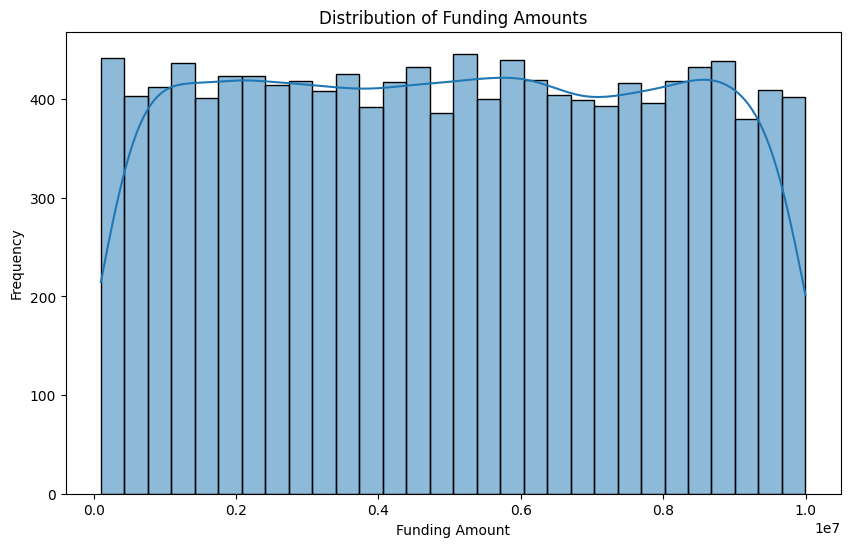

C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_27140\3717589546.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='viridis')


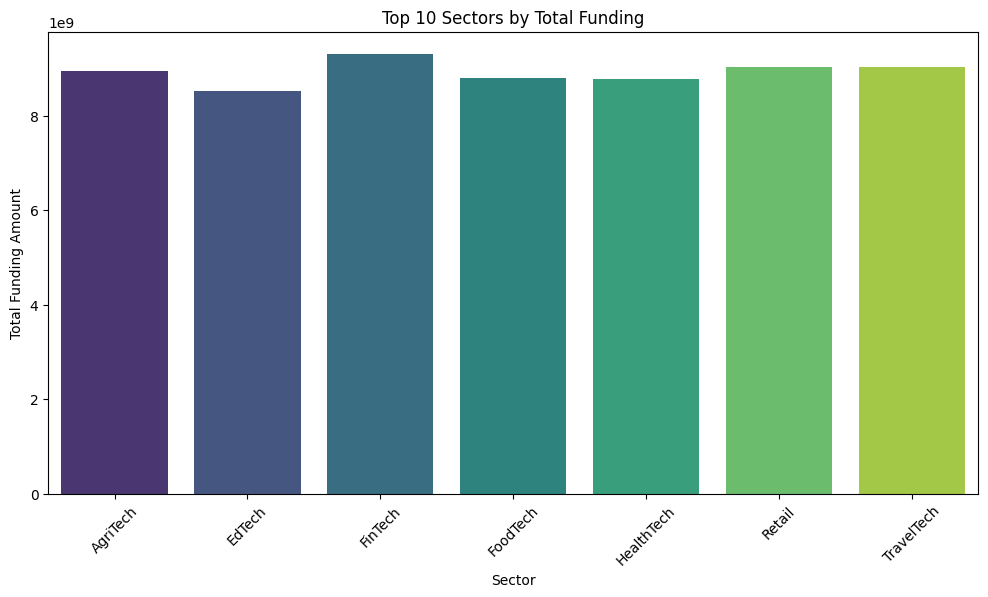

Ensuring compatibility with deprecated options for Inf values.


C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_27140\3717589546.py:19: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', False):


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount_Raised'], bins=30, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')
plt.show()
top_sectors = (
    df.groupby('Sector', observed=False)['Amount_Raised']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='viridis')
plt.title('Top 10 Sectors by Total Funding')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()
with pd.option_context('mode.use_inf_as_na', False):
    print("Ensuring compatibility with deprecated options for Inf values.")